# Предсказание стоимости квартиры в Москве

# Импорт библиотек

In [ ]:
#работа с данными
import numpy as np
import pandas as pd

#визуализация
import matplotlib.pyplot as plt
%matplotlib inline
!pip install missingno
import missingno as mi
import seaborn as sns

#разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

#заполнение пропусков в датасете
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#преобразование категориальных признаков
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#масштабирование данных
from sklearn.preprocessing import StandardScaler

#модели машиннного обучения
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#метрики для оценки качества модели
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

#поиск лучших параметров модели
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#сохранение моделей
import pickle

import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

In [ ]:
df = pd.read_csv('/content/df_final.csv')
df.drop(columns = ['Unnamed: 0', 'link', 'key_rent'], inplace = True)
print(df.shape)
df.head(5)

(1937, 12)


,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
0,36852900,6.0,ЦАО,48.30,23.9,5.0,8.0,2028.0,1,0,3.30,1
1,16739900,17.0,ЮАО,38.93,10.7,3.0,20.0,2024.0,1,0,2.85,1
2,18055560,8.0,ЮАО,39.70,13.2,8.0,28.0,2026.0,1,0,3.00,1
3,13984508,17.0,ЮАО,24.93,12.3,6.0,20.0,2024.0,1,0,2.85,1
4,14837840,24.0,ЗАО,38.60,21.6,6.0,27.0,2027.0,1,0,2.92,1


|     Признак       |              Описание признака                          |
|:------------------|:--------------------------------------------------------|
|       price       |   Целевая переменная. Стоимость квартиры
|                   |                                                         |
  min_to_metro      |   Количество минут до метро пешком                      |
|                   |                                                         |
  region_of_moscow  |   Адм. округа и регионы Москвы
|                   |                                                         |
  total_area        |   Общее число кв. м квартиры
|                   |                                                         |
  living_area       |   Число жилых кв. и квартиры
|                   |                                                         |
  floor             |   Этаж, на котором располагается квартира               |
|                   |                                                         |
  number_of_floors  |   Этажность дома                                        |
|                   |                                                         |
  construction_year |   Год постройки (сдачи) дома                            |            
|                   |
  is_new   |   Бинарный признак. 0 - вторичное жилье, 1 - новостройка         |
|                   |                                                         |
 is_apartments      |   Бинарный признак. 0 - не апартаменты, 1 - апартаменты |
|                   |                                                         |
 ceiling_height     |  Высота потолка квартиры                                |
|                   |                                                         |
 number_of_rooms    |     Количество комнат в квартире                        |
|                   |                                                         |
 min_to_metro       |   Количество минут до метро пешком                      |


# Первичный анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1937 non-null   int64  
 1   min_to_metro       1908 non-null   float64
 2   region_of_moscow   1919 non-null   object 
 3   total_area         1919 non-null   float64
 4   living_area        1264 non-null   float64
 5   floor              1904 non-null   float64
 6   number_of_floors   1648 non-null   float64
 7   construction_year  1245 non-null   float64
 8   is_new             1937 non-null   int64  
 9   is_apartments      1937 non-null   int64  
 10  ceiling_height     631 non-null    float64
 11  number_of_rooms    1937 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 181.7+ KB


In [ ]:
df.describe()

,price,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,1.937000e+03,1908.000000,1919.000000,1264.000000,1904.000000,1648.000000,1245.000000,1937.000000,1937.000000,631.000000,1937.000000
mean,4.023819e+07,10.512055,62.426962,32.478323,10.959559,21.073422,2008.812851,0.327310,0.580279,3.013376,1.901394
std,5.469274e+07,5.816938,38.447501,22.724866,12.469066,17.118823,25.429358,0.469353,0.493641,0.355308,0.813168
min,9.500000e+05,1.000000,9.500000,1.000000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.400000,1.000000
25%,1.160000e+07,6.000000,36.000000,16.000000,3.000000,9.000000,2008.000000,0.000000,0.000000,2.800000,1.000000
50%,2.100000e+07,10.000000,54.000000,27.400000,7.000000,17.000000,2020.000000,0.000000,1.000000,3.000000,2.000000
75%,4.700000e+07,15.000000,77.895000,41.850000,13.250000,25.000000,2024.000000,1.000000,1.000000,3.150000,3.000000
max,8.000000e+08,30.000000,320.000000,170.000000,85.000000,95.000000,2028.000000,1.000000,1.000000,6.000000,3.000000


In [ ]:
for column in df.columns:
    print(f'Количество пропущенных значений в {column}: {df[column].isna().sum()}')

Количество пропущенных значений в price: 0
Количество пропущенных значений в min_to_metro: 29
Количество пропущенных значений в region_of_moscow: 18
Количество пропущенных значений в total_area: 18
Количество пропущенных значений в living_area: 673
Количество пропущенных значений в floor: 33
Количество пропущенных значений в number_of_floors: 289
Количество пропущенных значений в construction_year: 692
Количество пропущенных значений в is_new: 0
Количество пропущенных значений в is_apartments: 0
Количество пропущенных значений в ceiling_height: 1306
Количество пропущенных значений в number_of_rooms: 0


# Визуальный анализ данных

# Распределения признаков

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'min_to_metro'}>,
        <Axes: title={'center': 'total_area'}>],
       [<Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'number_of_floors'}>],
       [<Axes: title={'center': 'construction_year'}>,
        <Axes: title={'center': 'is_new'}>,
        <Axes: title={'center': 'is_apartments'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'number_of_rooms'}>, <Axes: >]],
      dtype=object)

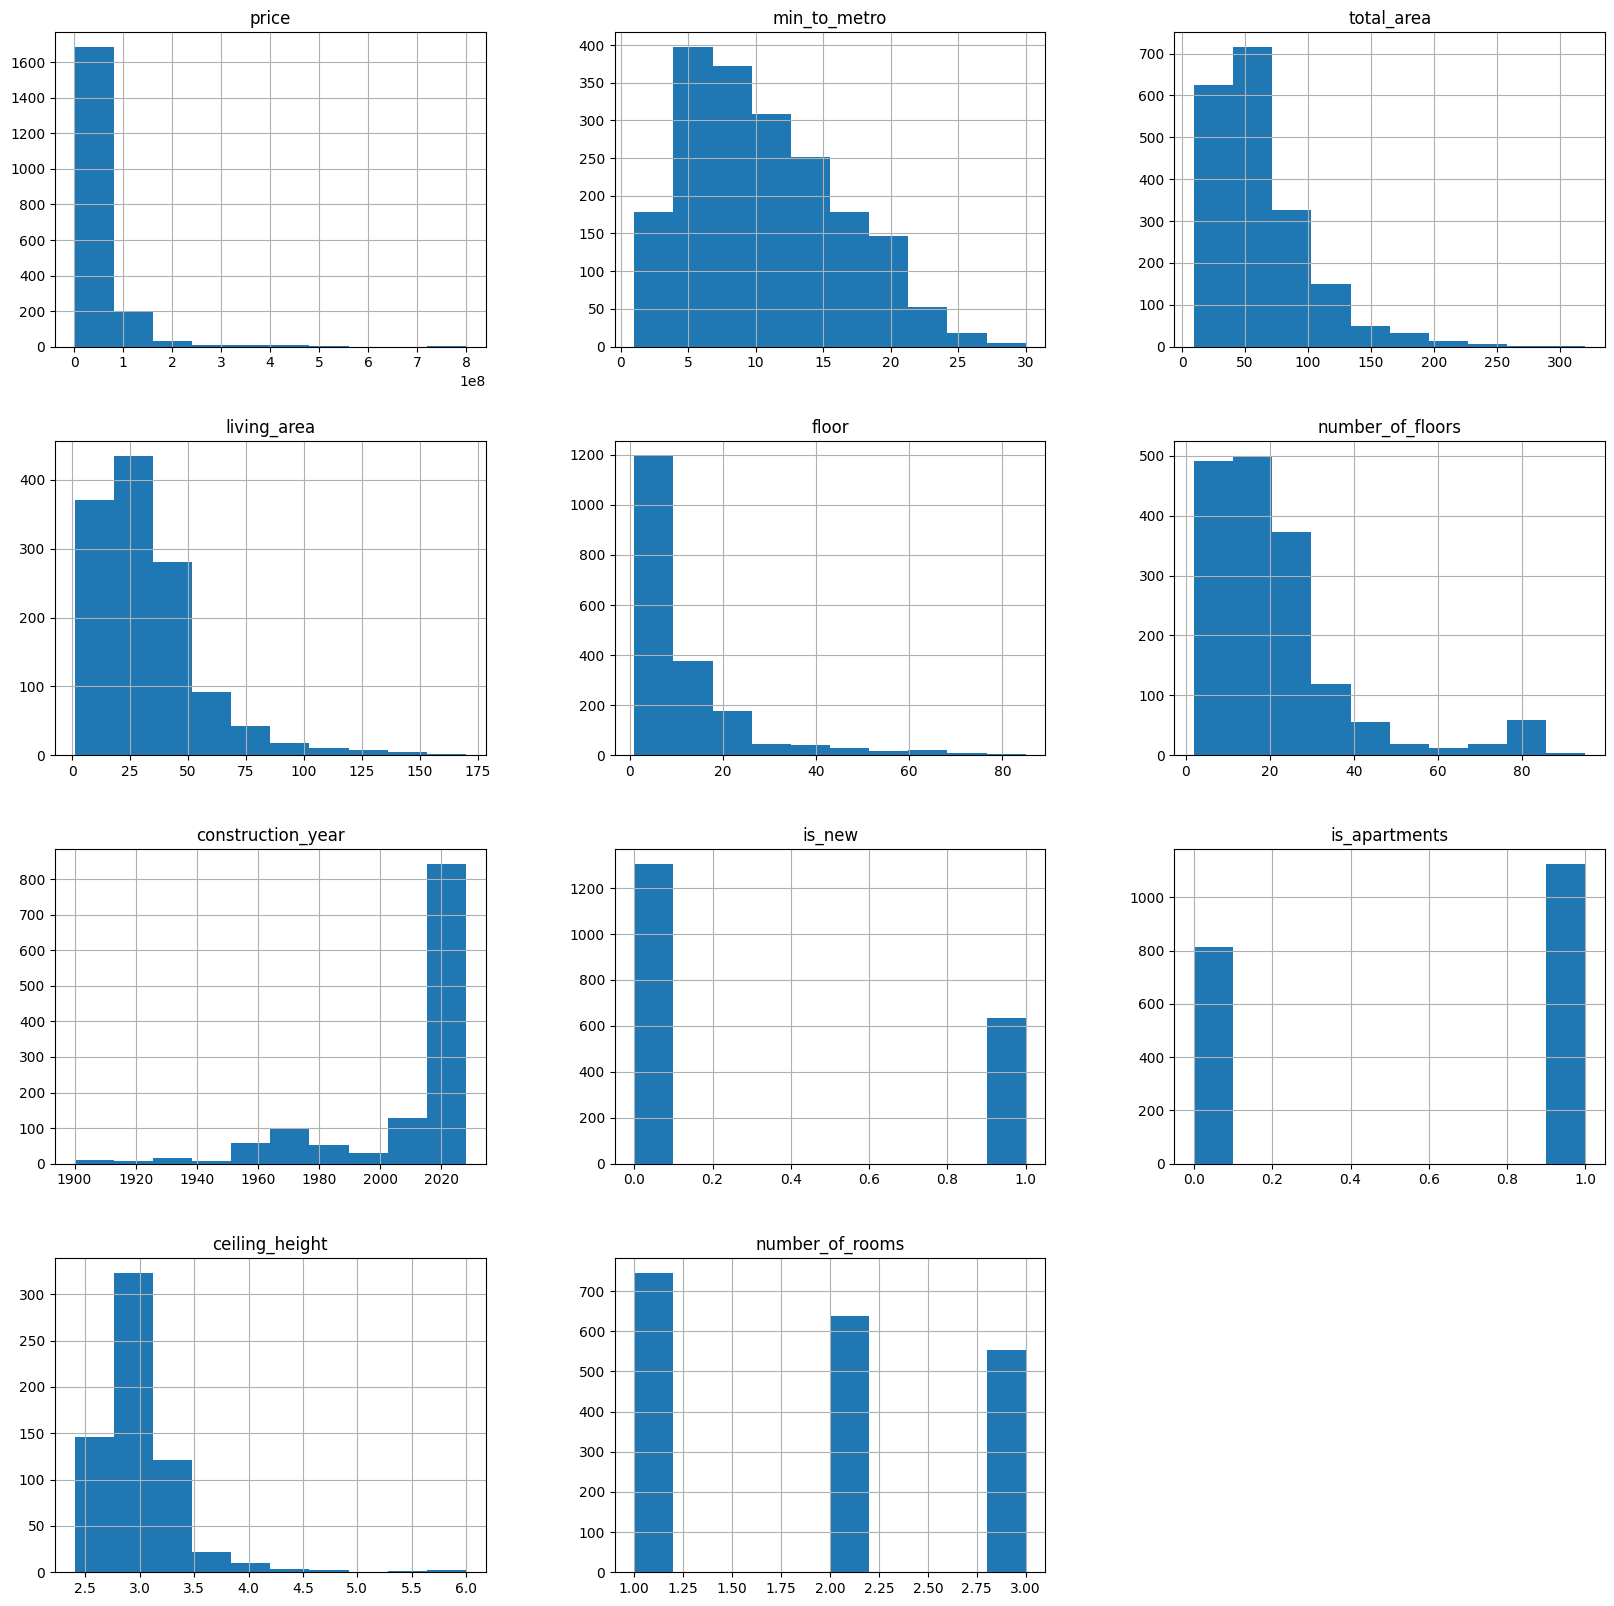

In [ ]:
df.hist(figsize=(20, 20))

# Матрица корреляций

In [ ]:
df_corr = df.copy()
df_corr['region_of_moscow'] = df_corr['region_of_moscow'].replace(
    {'ЮАО' : 11, 'СВАО' :1, 'ЗАО' :2, 'ЦАО' :3, 'ЮЗАО' : 4, 'ВАО' : 5, 'ЮВАО' : 6, 'СЗАО' : 7, 'САО' : 8,
       'НАО (Новомосковский)' : 9, 'ЗелАО' : 10, np.NaN : 0
    }
)

df_corr['region_of_moscow'] = df_corr['region_of_moscow'].astype('int64')

corr = df_corr.corr()

corr.style.background_gradient(cmap='coolwarm')

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
price,1.000000,-0.266555,-0.240513,0.782794,0.692339,0.173664,0.088058,0.078912,-0.097024,0.080837,0.363075,0.458756
min_to_metro,-0.266555,1.000000,0.173402,-0.271201,-0.215160,-0.141498,-0.130139,0.103726,0.127824,-0.110511,-0.147725,-0.129680
region_of_moscow,-0.240513,0.173402,1.000000,-0.203291,-0.176903,-0.128194,-0.134269,0.066288,0.118369,-0.139442,-0.166696,-0.124049
total_area,0.782794,-0.271201,-0.203291,1.000000,0.900997,0.288062,0.231385,0.037386,-0.149324,0.062057,0.358493,0.708081
living_area,0.692339,-0.215160,-0.176903,0.900997,1.000000,0.260766,0.245794,-0.038494,-0.236518,0.062045,0.287757,0.696982
floor,0.173664,-0.141498,-0.128194,0.288062,0.260766,1.000000,0.775255,0.237217,-0.029638,0.134029,0.197921,0.175736
number_of_floors,0.088058,-0.130139,-0.134269,0.231385,0.245794,0.775255,1.000000,0.320282,0.064298,0.081422,0.168462,0.094108
construction_year,0.078912,0.103726,0.066288,0.037386,-0.038494,0.237217,0.320282,1.000000,0.513752,0.266663,0.245801,-0.050676
is_new,-0.097024,0.127824,0.118369,-0.149324,-0.236518,-0.029638,0.064298,0.513752,1.000000,-0.066651,0.244369,-0.219900
is_apartments,0.080837,-0.110511,-0.139442,0.062057,0.062045,0.134029,0.081422,0.266663,-0.066651,1.000000,0.286919,0.065411


переменные, которые более всего коррелируют с тергетом: total_area, living_area, ceiling_height, number_of_rooms

признаки total_area и living_area имеют очень высокую корреляцию, один из низ правильно будет удалить из датасета - уберем living_area в дальнейшем

также признаки number_of_floors b и floor имеют очень высокую корреляцию, но для построения моделей их оба оставим, поскольку они хоть и связаны, но один из другого не следует: этажность здания, и этаж квартиры

# Пироговые диаграммы

## Расстояние до метро ##

<Axes: ylabel='count'>

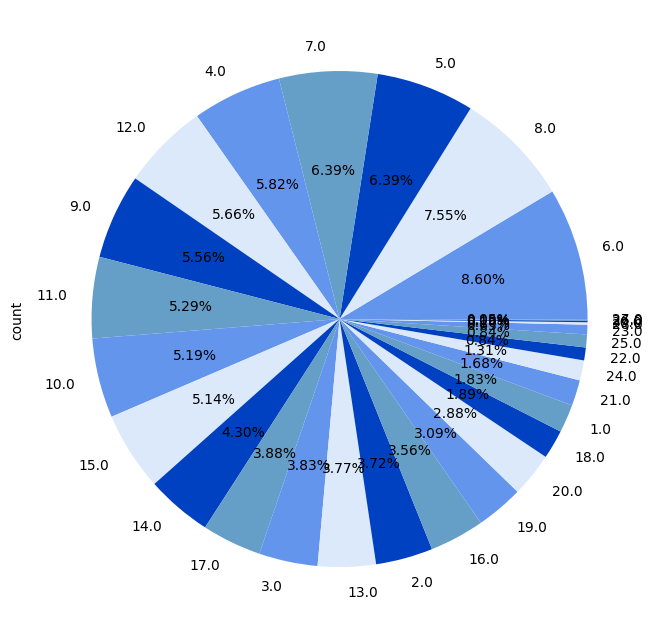

In [ ]:
min_to_metro_counts = df['min_to_metro'].value_counts()
min_to_metro_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED','#DBE9FA', '#0041C2', '#659EC7'],
                         figsize = (8, 10))

Чаще всего в датасете встречаются квартиры в 5-15 минутах от метро.

## Регион Москвы ##

<Axes: ylabel='count'>

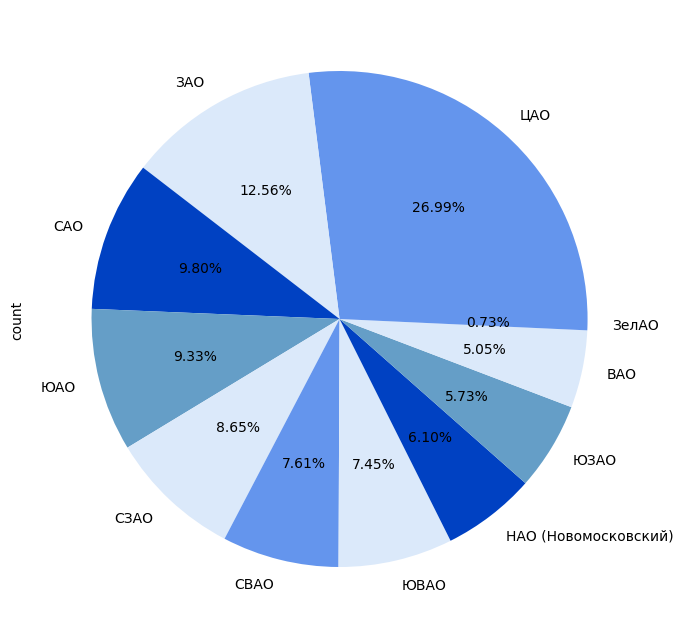

In [ ]:
region_of_moscow_counts = df['region_of_moscow'].value_counts()
region_of_moscow_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED','#DBE9FA', '#0041C2', '#659EC7', '#DBE9FA'],
                         figsize = (8, 10))

## Этаж, на котором располагается квартира ##

<Axes: ylabel='count'>

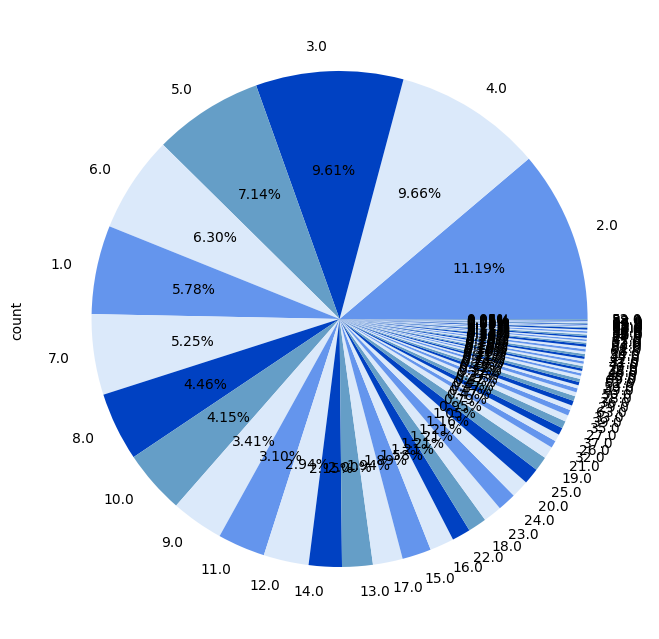

In [ ]:
floor_counts = df['floor'].value_counts()
floor_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED', '#DBE9FA', '#0041C2', '#659EC7', '#DBE9FA'],
                         figsize = (8, 10))

<Axes: ylabel='count'>

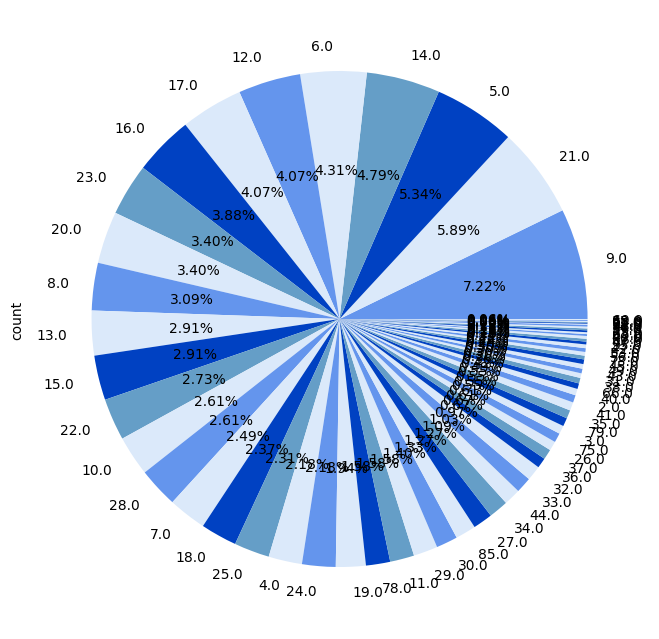

In [ ]:
number_of_floors_counts = df['number_of_floors'].value_counts()
number_of_floors_counts.plot(kind = 'pie',
                              autopct='%.2f%%',
                              colors=['#6495ED', '#DBE9FA', '#0041C2', '#659EC7', '#DBE9FA'],
                              figsize=(8,10))






самые популярные этажи квартир в датасете - со 2 по 10

## Год постройки здания ##

<Axes: ylabel='count'>

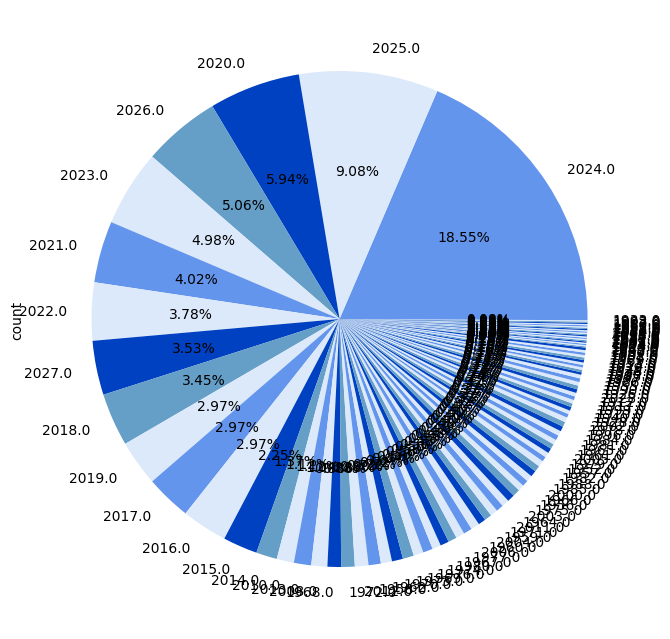

In [ ]:
construction_year_counts = df['construction_year'].value_counts()
construction_year_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED', '#DBE9FA', '#0041C2', '#659EC7', '#DBE9FA'],
                         figsize = (8, 10))

подавляющее большинство квартир в датасете - новостройки (2020-2026 годов сдачи)

## Новостройка или вторичка? ##

<Axes: ylabel='count'>

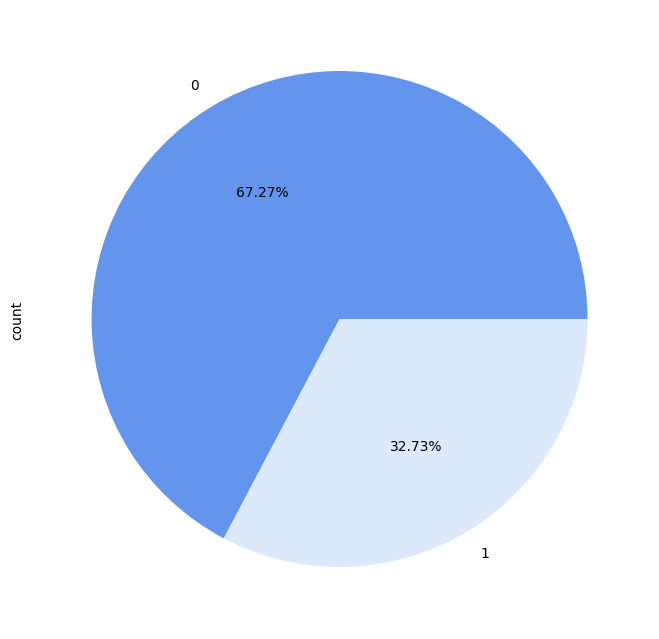

In [ ]:
is_new_counts = df['is_new'].value_counts()
is_new_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED', '#DBE9FA'],
                         figsize = (8, 10))

большинство квартир в датасете - вторичное жилье

## Тип жилья (апартаменты -1, квартира - 0) ##

<Axes: ylabel='count'>

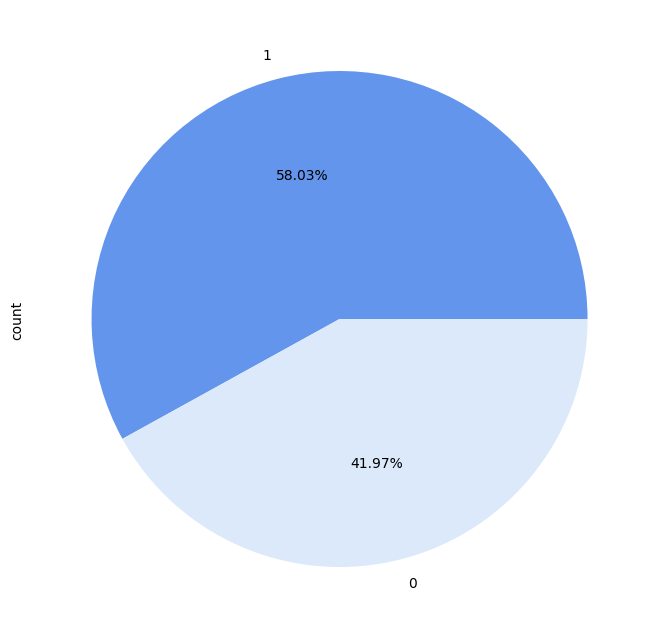

In [ ]:
is_apartments_counts = df['is_apartments'].value_counts()
is_apartments_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED','#DBE9FA'],
                         figsize = (8, 10))

большинство квартир в датасете являются апартаментами

## Высота потолков ##

<Axes: ylabel='count'>

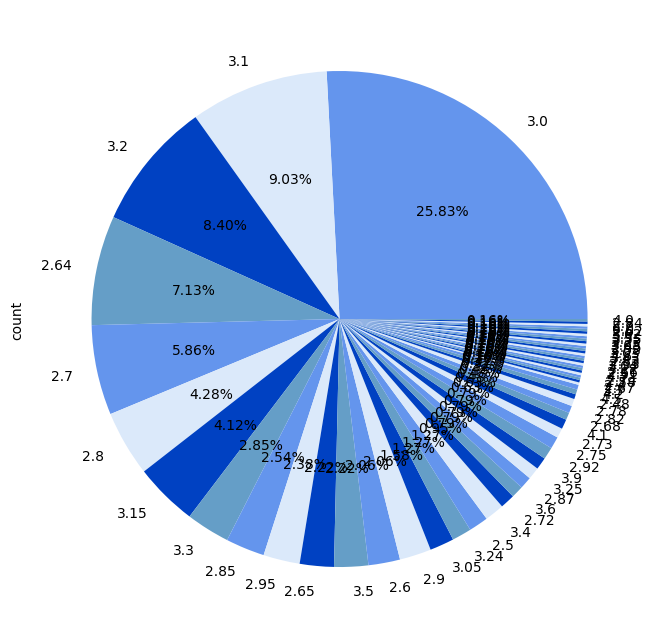

In [ ]:
ceiling_height_counts = df['ceiling_height'].value_counts()
ceiling_height_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED', '#DBE9FA', '#0041C2', '#659EC7'],
                         figsize = (8, 10))

большинство квартир в датасете со стандартой высотой потолков - около 3 м

## Количество комнат ##

<Axes: ylabel='count'>

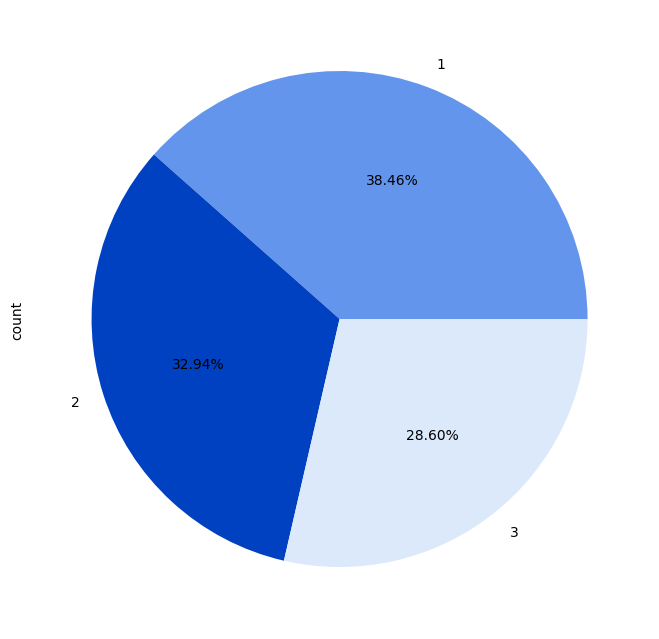

In [ ]:
number_of_rooms_counts = df['number_of_rooms'].value_counts()
number_of_rooms_counts.plot(kind = 'pie',
                         autopct = '%.2f%%',
                         colors = ['#6495ED','#0041C2', '#DBE9FA'],
                         figsize = (8, 10))

в датасете примерно одинаково одно-, двух- и трех-комнатных квартир

# Визуализация пропущенных значений в датасете

Visualizing missing value using matrix


<Axes: >

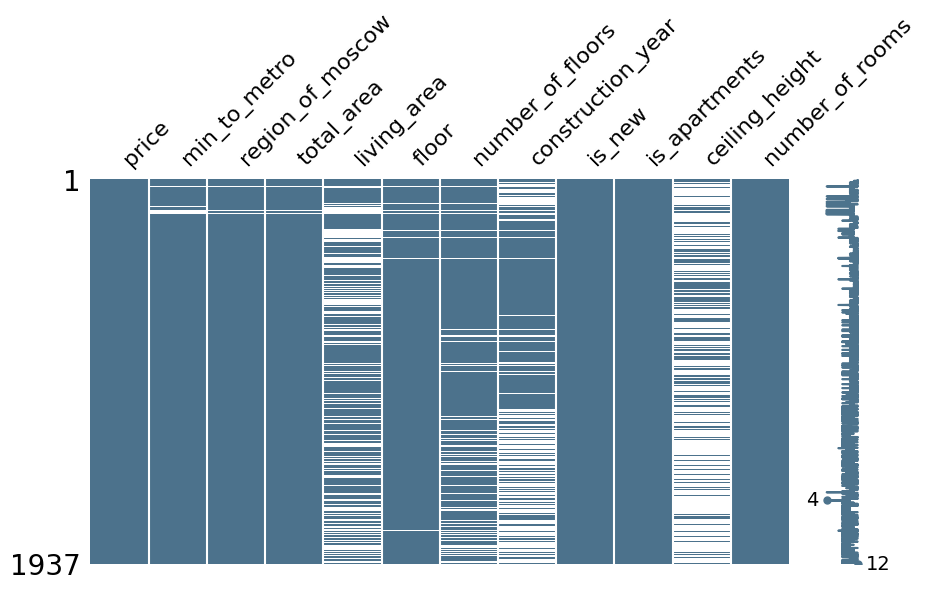

In [ ]:
print('Visualizing missing value using matrix')
mi.matrix(df, color = (0.3, 0.45, 0.55), figsize = (10,5))

# Парные зависимости переменных

In [ ]:
df_corr = df_corr.dropna()
df_corr.isna().sum()

,0
price,0
min_to_metro,0
region_of_moscow,0
total_area,0
living_area,0
floor,0
number_of_floors,0
construction_year,0
is_new,0
is_apartments,0


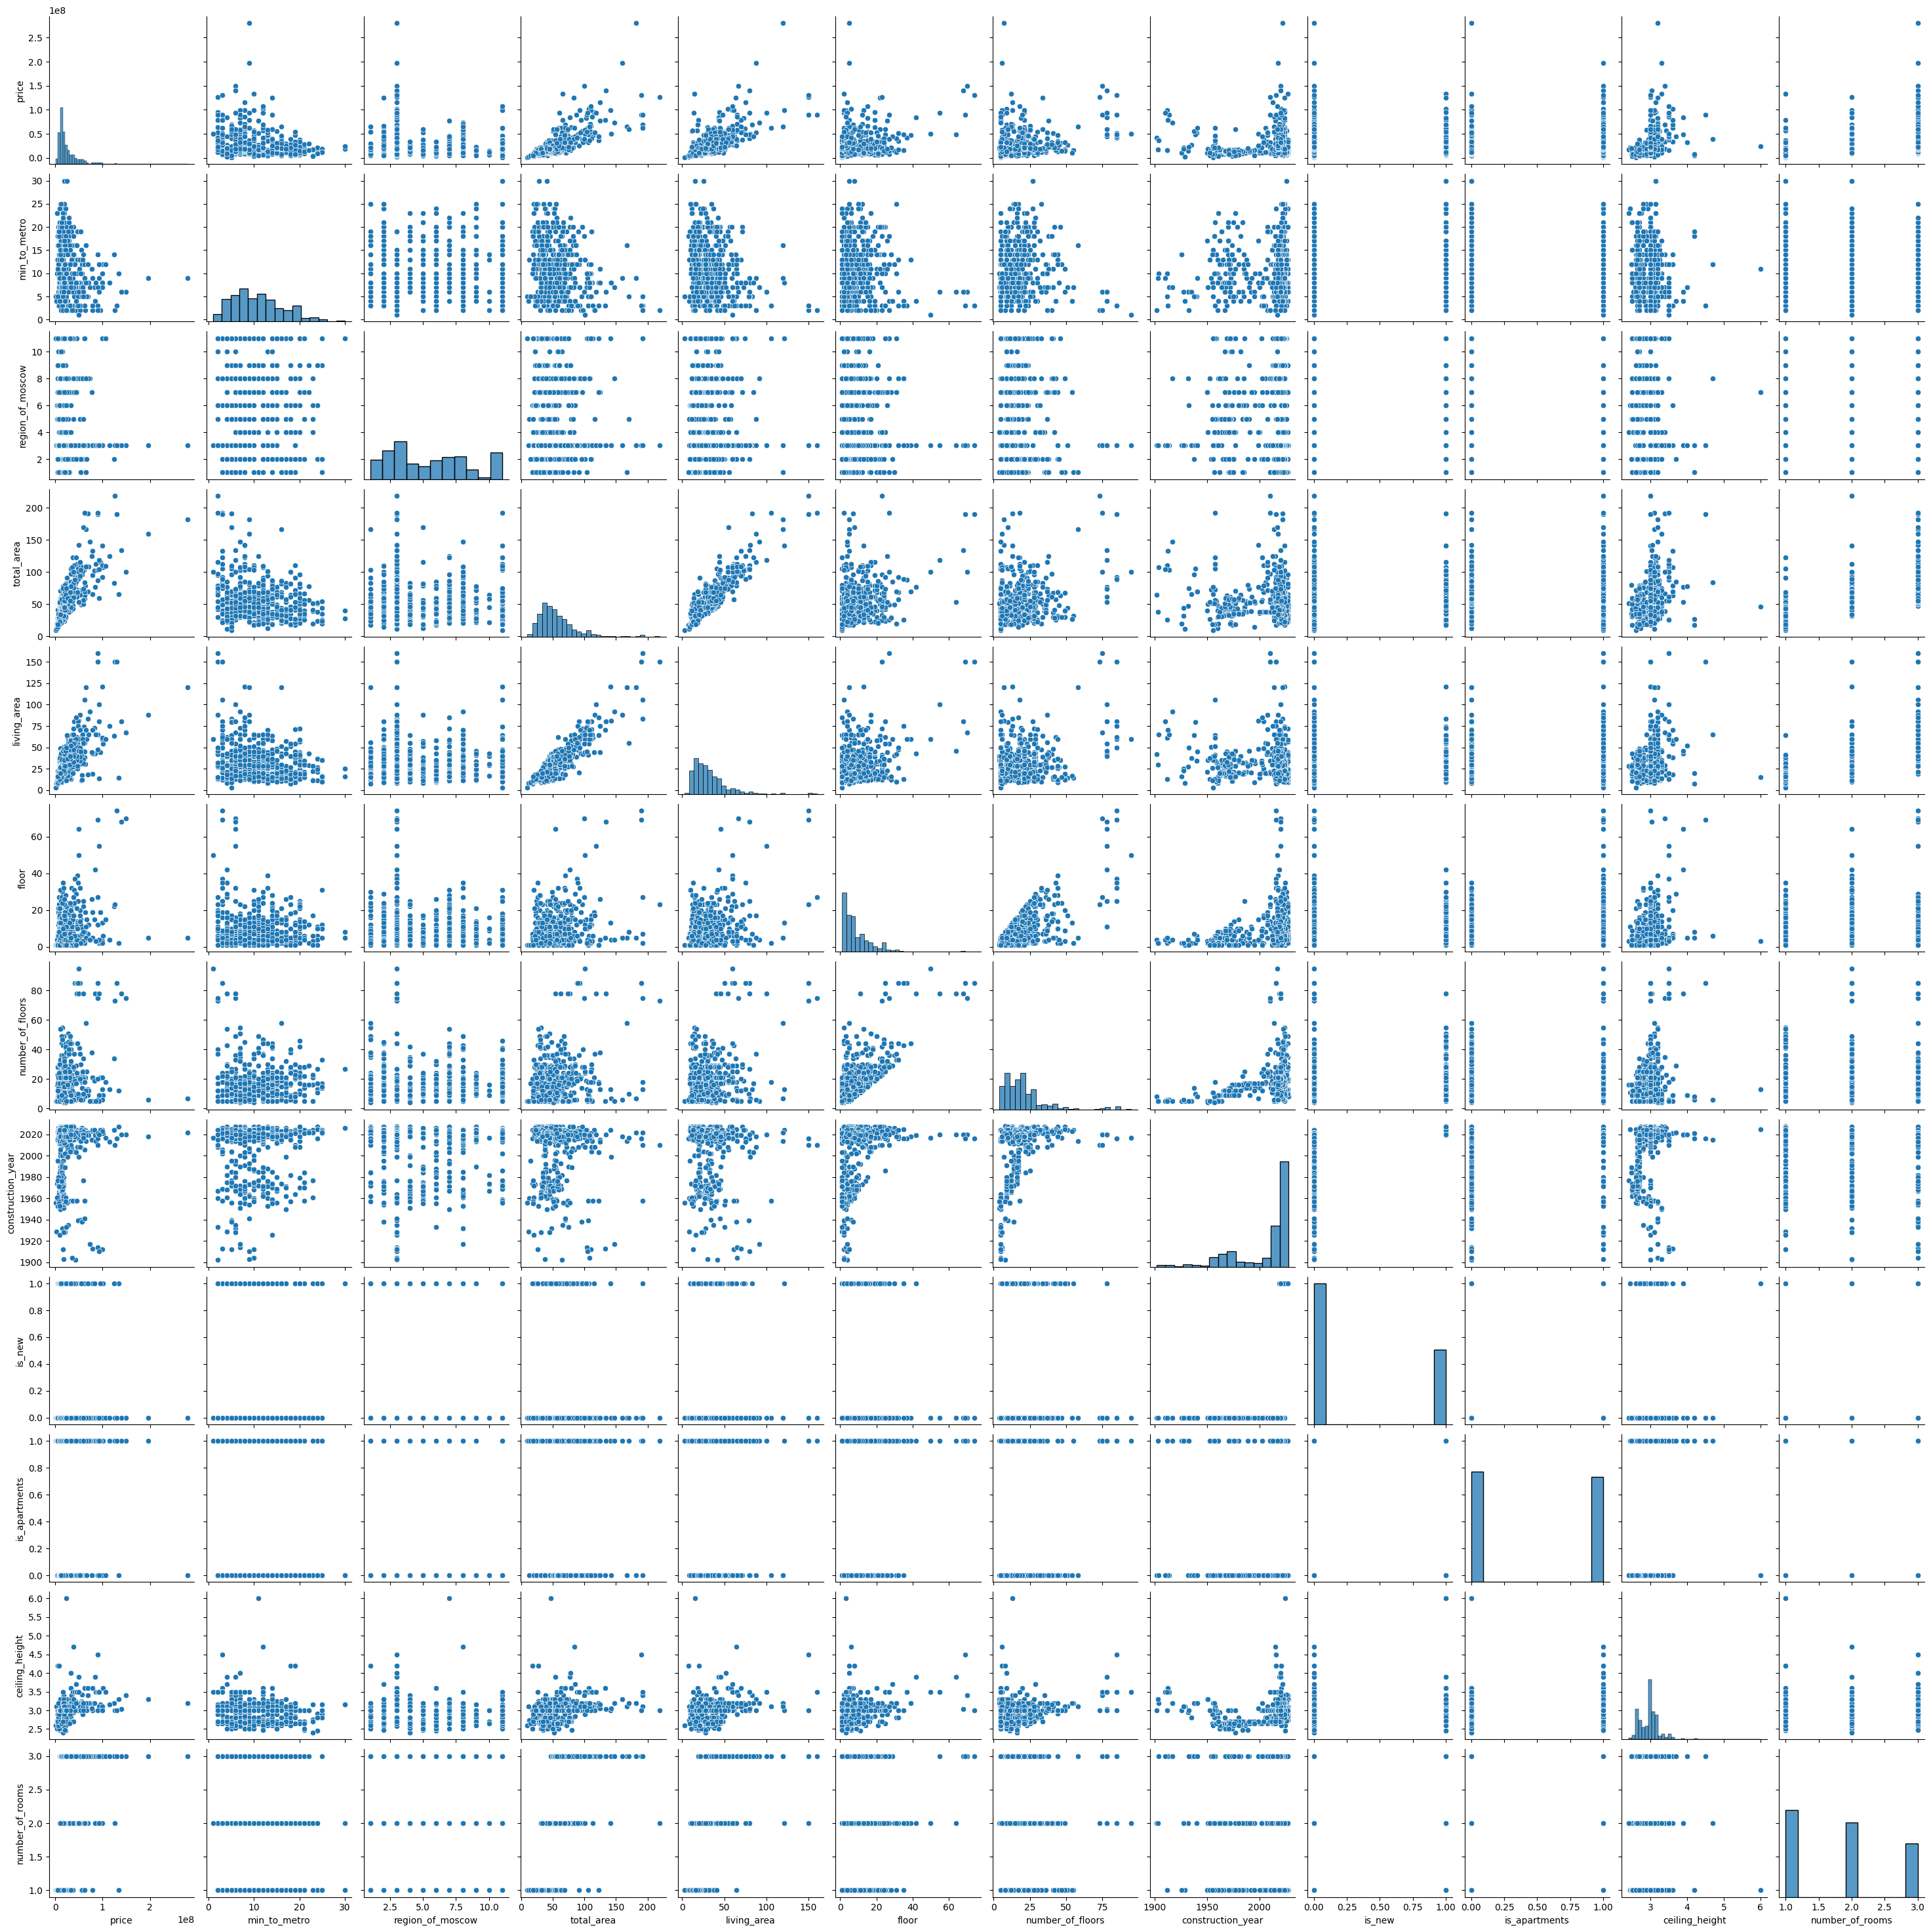

In [ ]:
sns.pairplot(df_corr)

# Визуализация категориального признака

<Axes: xlabel='region_of_moscow', ylabel='price'>

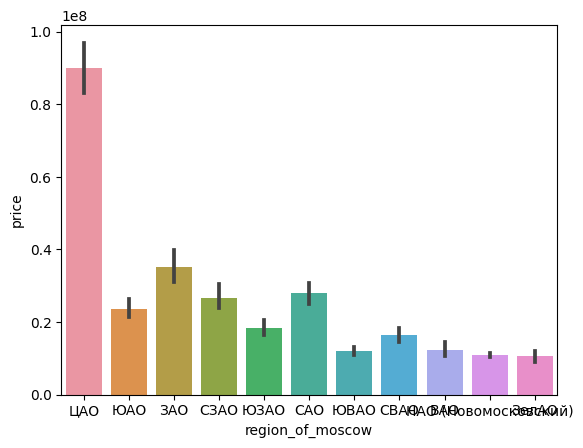

In [ ]:
sns.barplot(data=df, x="region_of_moscow", y="price")

на стоимост квартиры влияет район, в котором расположена квартира, в данном датасете самый "дорогой" район - ЦАО

# Визуализация выбросных значений в признаках total_area, living_area, ceiling_height, floor, number_of_floors

<Axes: ylabel='total_area'>

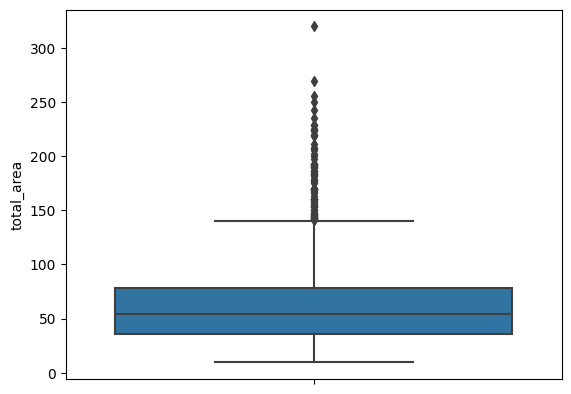

In [ ]:
sns.boxplot(y='total_area', data=df)

<Axes: ylabel='living_area'>

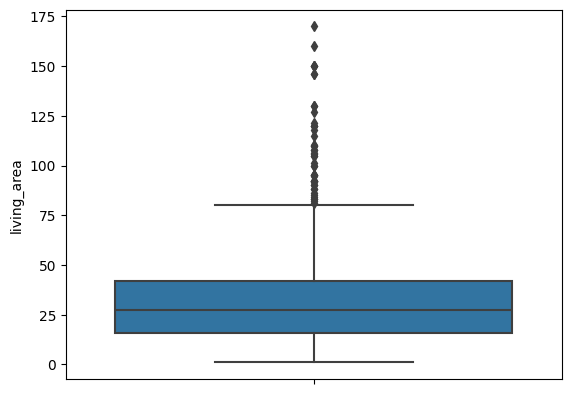

In [ ]:
sns.boxplot(y='living_area', data=df)

<Axes: ylabel='ceiling_height'>

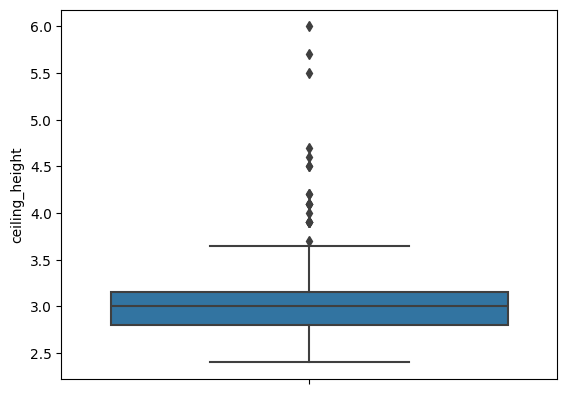

In [ ]:
sns.boxplot(y='ceiling_height', data=df)

<Axes: ylabel='floor'>

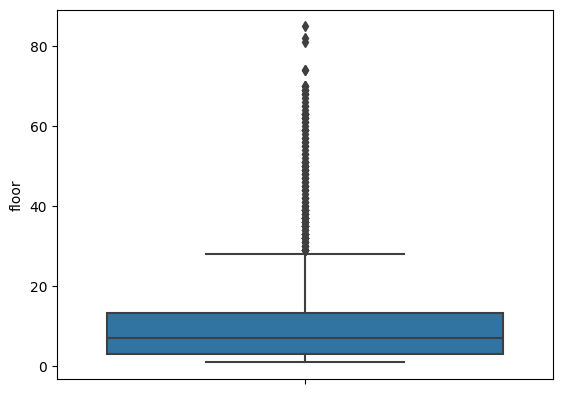

In [ ]:
sns.boxplot(y='floor', data=df)

<Axes: ylabel='number_of_floors'>

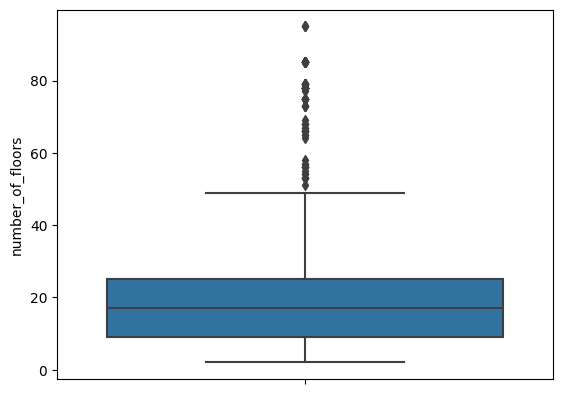

In [ ]:
sns.boxplot(y='number_of_floors', data=df)

# Предобработка данных

разделим признаки датасета для удобства на 4 категории: числовые, бинарные, категориальные, таргет (целевой признак)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1937 non-null   int64  
 1   min_to_metro       1908 non-null   float64
 2   region_of_moscow   1919 non-null   object 
 3   total_area         1919 non-null   float64
 4   living_area        1264 non-null   float64
 5   floor              1904 non-null   float64
 6   number_of_floors   1648 non-null   float64
 7   construction_year  1245 non-null   float64
 8   is_new             1937 non-null   int64  
 9   is_apartments      1937 non-null   int64  
 10  ceiling_height     631 non-null    float64
 11  number_of_rooms    1937 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 181.7+ KB


In [ ]:
numerical_features =[]
for column in df.columns:
    if df[column].dtype == 'float64' and column != 'price':
        numerical_features.append(column)
numerical_features.append('number_of_rooms')
numerical_features

['min_to_metro',
 'total_area',
 'living_area',
 'floor',
 'number_of_floors',
 'construction_year',
 'ceiling_height',
 'number_of_rooms']

In [ ]:
binary_features =[]
for column in df.columns:
    if df[column].dtype == 'int64' and column != 'number_of_rooms' and column != 'price':
        binary_features.append(column)
binary_features

['is_new', 'is_apartments']

In [ ]:
categorical_features = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)
categorical_features

['region_of_moscow']

In [ ]:
target = ['price']

Перед всеми преобразованиями данных разделим выборку на данные для обучения, и тестирования. Сделаем это до всех преобразований намеренно, чтобы максимально приблизить задачу к реальной.

In [ ]:
X = df.drop(columns = target)
y = df[target]
print(X.shape, y.shape)

(1937, 11) (1937, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True, random_state = 68)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1549, 11)
(1549, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(388, 11)
(388, 1)


# Поиск выбросов методом трех сигм

**поиск выбросов применяю только к высоте потолка, этажности здания и этажу, на котором располагается квартира, поскольку замена/удаление выбросных значений общей и жилой площади вредит качеству модели**

In [ ]:
X_train.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,1530.000000,1538.000000,1011.000000,1525.000000,1309.000000,999.000000,1549.000000,1549.000000,512.000000,1549.000000
mean,10.499346,63.188758,32.672404,10.923279,20.996944,2008.868869,0.329890,0.579083,3.004902,1.916720
std,5.829185,39.303551,22.609720,12.265973,16.999595,25.210732,0.470325,0.493866,0.340773,0.818179
min,1.000000,9.500000,2.700000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.400000,1.000000
25%,6.000000,36.500000,16.000000,3.000000,9.000000,2008.000000,0.000000,0.000000,2.800000,1.000000
50%,9.000000,54.500000,27.400000,7.000000,17.000000,2020.000000,0.000000,1.000000,3.000000,2.000000
75%,15.000000,79.325000,43.000000,14.000000,25.000000,2024.000000,1.000000,1.000000,3.150000,3.000000
max,30.000000,320.000000,170.000000,82.000000,95.000000,2028.000000,1.000000,1.000000,5.700000,3.000000


In [ ]:
 for i in (['ceiling_height', 'floor', 'number_of_floors']):
   s = X_train[i].std()
   left = -3 * s + X_train[i].mean()
   right = 3 * s + X_train[i].mean()
   X_train.loc[df[i] < left, i] = np.NaN
   X_train.loc[df[i] > right, i] = np.NaN

In [ ]:
X_train.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,1530.000000,1538.000000,1011.000000,1477.000000,1250.000000,999.000000,1549.000000,1549.000000,502.000000,1549.000000
mean,10.499346,63.188758,32.672404,9.362898,18.225600,2008.868869,0.329890,0.579083,2.973725,1.916720
std,5.829185,39.303551,22.609720,8.696692,11.445152,25.210732,0.470325,0.493866,0.249775,0.818179
min,1.000000,9.500000,2.700000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.400000,1.000000
25%,6.000000,36.500000,16.000000,3.000000,9.000000,2008.000000,0.000000,0.000000,2.780000,1.000000
50%,9.000000,54.500000,27.400000,6.000000,16.000000,2020.000000,0.000000,1.000000,3.000000,2.000000
75%,15.000000,79.325000,43.000000,12.000000,23.000000,2024.000000,1.000000,1.000000,3.100000,3.000000
max,30.000000,320.000000,170.000000,47.000000,69.000000,2028.000000,1.000000,1.000000,4.000000,3.000000


In [ ]:
X_test.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,378.000000,381.000000,253.000000,379.000000,339.000000,246.000000,388.000000,388.000000,119.000000,388.000000
mean,10.563492,59.351785,31.702767,11.105541,21.368732,2008.585366,0.317010,0.585052,3.049832,1.840206
std,5.774493,34.656270,23.208524,13.270863,17.594118,26.350054,0.465912,0.493349,0.411677,0.790925
min,1.000000,10.700000,1.000000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.480000,1.000000
25%,6.000000,35.600000,15.000000,3.000000,9.000000,2012.250000,0.000000,0.000000,2.850000,1.000000
50%,10.000000,52.100000,27.500000,6.000000,17.000000,2020.000000,0.000000,1.000000,3.000000,2.000000
75%,15.000000,72.000000,39.000000,13.000000,25.000000,2024.000000,1.000000,1.000000,3.150000,2.000000
max,28.000000,223.300000,150.000000,85.000000,95.000000,2028.000000,1.000000,1.000000,6.000000,3.000000


In [ ]:
 for i in (['ceiling_height', 'floor', 'number_of_floors']):
   s = X_test[i].std()
   left = -3 * s + X_test[i].mean()
   right = 3 * s + X_test[i].mean()
   X_test.loc[df[i] < left, i] = np.NaN
   X_test.loc[df[i] > right, i] = np.NaN

In [ ]:
X_test.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,378.000000,381.000000,253.000000,367.000000,323.000000,246.000000,388.000000,388.000000,117.000000,388.000000
mean,10.563492,59.351785,31.702767,9.297003,18.371517,2008.585366,0.317010,0.585052,3.012222,1.840206
std,5.774493,34.656270,23.208524,8.726354,11.529791,26.350054,0.465912,0.493349,0.278952,0.790925
min,1.000000,10.700000,1.000000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.480000,1.000000
25%,6.000000,35.600000,15.000000,3.000000,9.000000,2012.250000,0.000000,0.000000,2.850000,1.000000
50%,10.000000,52.100000,27.500000,6.000000,16.000000,2020.000000,0.000000,1.000000,3.000000,2.000000
75%,15.000000,72.000000,39.000000,12.000000,23.500000,2024.000000,1.000000,1.000000,3.150000,2.000000
max,28.000000,223.300000,150.000000,50.000000,66.000000,2028.000000,1.000000,1.000000,4.100000,3.000000


выбросные значения заменены на NaN, чтобы в дальнейшем при заполнении пустых значений в датасете применить к выбросам те же методы, что и к пустым значениям

# Замена пропущенных значений

## Пропуски в числовых признаках ##

In [ ]:
knn = KNNImputer()
knn.fit(X_train[numerical_features])

KNNImputer()

In [ ]:
%%time
X_train[numerical_features] = knn.transform(X_train[numerical_features])

CPU times: user 200 ms, sys: 152 ms, total: 353 ms
Wall time: 193 ms


In [ ]:
X_train[numerical_features].isna().sum()

,0
min_to_metro,0
total_area,0
living_area,0
floor,0
number_of_floors,0
construction_year,0
ceiling_height,0
number_of_rooms,0


In [ ]:
X_test[numerical_features].isna().sum()

,0
min_to_metro,10
total_area,7
living_area,135
floor,21
number_of_floors,65
construction_year,142
ceiling_height,271
number_of_rooms,0


In [ ]:
%%time
X_test[numerical_features] = knn.transform(X_test[numerical_features])

CPU times: user 56 ms, sys: 55 ms, total: 111 ms
Wall time: 59.5 ms


In [ ]:
X_test[numerical_features].isna().sum()

,0
min_to_metro,0
total_area,0
living_area,0
floor,0
number_of_floors,0
construction_year,0
ceiling_height,0
number_of_rooms,0


## Пропуски в категориальных признаках ##

In [ ]:
X_train[categorical_features].isna().sum()

,0
region_of_moscow,11


In [ ]:
X_test[categorical_features].isna().sum()

,0
region_of_moscow,7


In [ ]:
si_cat = SimpleImputer(strategy='most_frequent')
si_cat.fit(X_train[categorical_features])
X_train[categorical_features] = si_cat.transform(X_train[categorical_features])
X_test[categorical_features] = si_cat.transform(X_test[categorical_features])

In [ ]:
X_train[categorical_features].isna().sum()

,0
region_of_moscow,0


In [ ]:
X_test[categorical_features].isna().sum()

,0
region_of_moscow,0


In [ ]:
X_train.isna().sum()

,0
min_to_metro,0
region_of_moscow,0
total_area,0
living_area,0
floor,0
number_of_floors,0
construction_year,0
is_new,0
is_apartments,0
ceiling_height,0


In [ ]:
X_test.isna().sum()

,0
min_to_metro,0
region_of_moscow,0
total_area,0
living_area,0
floor,0
number_of_floors,0
construction_year,0
is_new,0
is_apartments,0
ceiling_height,0


# Преобразование категориальных признаков

In [ ]:
pd.get_dummies(X_train[categorical_features], dtype=int)

X_train_new = pd.concat([X_train, pd.get_dummies(X_train[categorical_features],dtype=int, prefix=categorical_features)], axis=1)

X_train_new.drop(columns=categorical_features, inplace=True)

print(X_train_new.shape)
X_train_new

(1549, 21)


,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,...,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
761,12.0,37.5,19.00,4.0,17.0,2013.0,0,0,2.740,1.0,...,0,0,1,0,0,0,0,0,0,0
1206,5.0,26.0,13.00,5.0,5.0,1912.0,0,1,3.500,1.0,...,0,0,0,0,0,0,1,0,0,0
1929,2.0,185.0,124.56,27.0,18.4,2010.4,0,1,3.280,3.0,...,0,0,0,0,0,0,1,0,0,0
1249,2.0,14.7,11.70,1.0,2.0,1950.0,0,1,2.786,1.0,...,0,0,0,0,0,0,1,0,0,0
646,3.0,122.4,64.00,1.0,18.0,1958.0,0,0,3.100,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,24.0,62.0,24.80,9.0,17.0,2023.8,1,0,3.120,2.0,...,0,0,0,0,0,0,0,1,0,0
932,6.0,108.7,57.30,8.0,8.0,2022.0,0,0,3.360,2.0,...,0,0,0,0,0,0,1,0,0,0
1447,4.0,116.2,65.08,25.0,28.6,2020.4,0,1,3.140,2.0,...,0,0,0,0,0,0,1,0,0,0
1522,3.0,92.0,50.00,32.0,41.2,2016.0,0,1,3.000,2.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
pd.get_dummies(X_test[categorical_features], dtype=int)

X_test_new = pd.concat([X_test, pd.get_dummies(X_test[categorical_features],dtype=int, prefix=categorical_features)], axis=1)

X_test_new.drop(columns=categorical_features, inplace=True)

print(X_test_new.shape)
X_test_new

(388, 21)


,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,...,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
195,20.0,63.78,35.20,2.0,46.0,2023.0,1,0,3.000,2.0,...,0,0,0,0,0,0,0,1,0,0
849,10.0,109.90,68.00,3.0,8.0,2005.0,0,0,3.310,2.0,...,0,0,0,0,0,0,1,0,0,0
78,6.0,32.80,20.00,4.0,28.0,2025.0,1,0,2.904,1.0,...,0,0,0,0,0,0,0,1,0,0
1528,10.0,44.60,26.20,12.0,22.0,2020.6,0,1,3.060,2.0,...,0,0,0,1,0,0,0,0,0,0
747,10.0,48.00,30.84,4.0,7.0,1926.0,0,0,3.050,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,6.0,101.70,70.00,3.0,6.0,2000.6,0,1,3.360,3.0,...,0,0,0,0,0,0,1,0,0,0
1525,15.0,41.40,20.92,18.0,25.6,2003.4,0,1,2.950,2.0,...,0,0,0,0,0,0,0,0,0,0
1777,14.0,68.50,53.00,11.0,28.0,2019.0,0,1,3.060,3.0,...,1,0,0,0,0,0,0,0,0,0
1046,12.0,63.20,44.10,11.0,12.0,1974.0,0,0,2.622,3.0,...,0,0,0,1,0,0,0,0,0,0


# Масштабирование данных - нормализация данных

In [ ]:
X_train_new.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,...,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,...,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,10.524726,63.027482,36.271065,9.561394,18.939316,2007.931440,0.329890,0.579083,3.010389,1.916720,...,0.125888,0.008393,0.059393,0.101356,0.067786,0.086507,0.277598,0.093609,0.076824,0.057456
std,5.807732,39.220307,25.151813,8.743029,12.243120,23.304444,0.470325,0.493866,0.214084,0.818179,...,0.331830,0.091255,0.236435,0.301897,0.251459,0.281203,0.447959,0.291378,0.266398,0.232788
min,1.000000,9.500000,2.700000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.400000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,36.600000,17.220000,3.000000,10.000000,2000.000000,0.000000,0.000000,2.886000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,54.400000,30.340000,7.000000,16.800000,2019.000000,0.000000,1.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,79.100000,47.920000,13.000000,24.000000,2024.000000,1.000000,1.000000,3.150000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,30.000000,320.000000,170.000000,47.000000,69.000000,2028.000000,1.000000,1.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test_new.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,...,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
count,388.000000,388.000000,388.00000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,10.580412,59.045902,33.85299,9.484536,18.791237,2007.438144,0.317010,0.585052,3.004495,1.840206,...,0.118557,0.002577,0.064433,0.079897,0.105670,0.082474,0.273196,0.087629,0.061856,0.054124
std,5.709182,34.459549,23.56369,8.619446,11.703001,24.096494,0.465912,0.493349,0.219791,0.790925,...,0.323684,0.050767,0.245840,0.271484,0.307812,0.275441,0.446176,0.283119,0.241204,0.226554
min,1.000000,10.700000,1.00000,1.000000,2.000000,1900.000000,0.000000,0.000000,2.480000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,35.775000,15.72000,3.000000,9.950000,1999.350000,0.000000,0.000000,2.869500,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,51.900000,29.00000,6.600000,16.200000,2018.000000,0.000000,1.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,71.775000,42.30000,12.200000,24.000000,2023.350000,1.000000,1.000000,3.130000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,28.000000,223.300000,150.00000,50.000000,66.800000,2028.000000,1.000000,1.000000,4.100000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()

scaler.fit(X_train_new[X_train_new.columns])

X_train_new[X_train_new.columns] = scaler.transform(X_train_new[X_train_new.columns])
X_test_new[X_test_new.columns] = scaler.transform(X_test_new[X_test_new.columns])


In [ ]:
print(X_train_new.shape)
print(X_test_new.shape)

(1549, 21)
(388, 21)


In [ ]:
X_train_new.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,...,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
count,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,...,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03,1549.000000,1.549000e+03,1.549000e+03,1.549000e+03,1.549000e+03
mean,-2.247682e-16,-2.029794e-16,3.440330e-18,-5.045817e-17,1.284390e-16,2.691485e-15,3.784363e-17,1.834842e-17,-2.075666e-15,2.064198e-17,...,-5.733883e-18,2.752264e-17,-3.096297e-17,3.669685e-17,-5.733883e-18,0.000000,8.027436e-18,-4.701784e-17,-1.662826e-17,1.146777e-17
std,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,...,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00
min,-1.640537e+00,-1.365231e+00,-1.335168e+00,-9.795415e-01,-1.384025e+00,-4.632863e+00,-7.016359e-01,-1.172931e+00,-2.852087e+00,-1.120802e+00,...,-3.794967e-01,-9.199751e-02,-2.512836e-01,-3.358383e-01,-2.696566e-01,-0.307733,-6.198965e-01,-3.213664e-01,-2.884732e-01,-2.468986e-01
25%,-7.793380e-01,-6.740390e-01,-7.576876e-01,-7.507139e-01,-7.303859e-01,-3.404501e-01,-7.016359e-01,-1.172931e+00,-5.812153e-01,-1.120802e+00,...,-3.794967e-01,-9.199751e-02,-2.512836e-01,-3.358383e-01,-2.696566e-01,-0.307733,-6.198965e-01,-3.213664e-01,-2.884732e-01,-2.468986e-01
50%,-9.037866e-02,-2.200459e-01,-2.358868e-01,-2.930588e-01,-1.747926e-01,4.751083e-01,-7.016359e-01,8.525652e-01,-4.854170e-02,1.018193e-01,...,-3.794967e-01,-9.199751e-02,-2.512836e-01,-3.358383e-01,-2.696566e-01,-0.307733,-6.198965e-01,-3.213664e-01,-2.884732e-01,-2.468986e-01
75%,7.708206e-01,4.099333e-01,4.632945e-01,3.934239e-01,4.134827e-01,6.897289e-01,1.425241e+00,8.525652e-01,6.523446e-01,1.324441e+00,...,-3.794967e-01,-9.199751e-02,-2.512836e-01,-3.358383e-01,-2.696566e-01,-0.307733,1.613173e+00,-3.213664e-01,-2.884732e-01,-2.468986e-01
max,3.354418e+00,6.554143e+00,5.318588e+00,4.283492e+00,4.090203e+00,8.614254e-01,1.425241e+00,8.525652e-01,4.624034e+00,1.324441e+00,...,2.635069e+00,1.086986e+01,3.979567e+00,2.977624e+00,3.708420e+00,3.249569,1.613173e+00,3.111713e+00,3.466527e+00,4.050246e+00


In [ ]:
X_test_new.describe()

,min_to_metro,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,...,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,0.009591,-0.101551,-0.096170,-0.008794,-0.012099,-0.021174,-0.027394,0.012089,-0.027539,-0.093548,...,-0.022100,-0.063745,0.021323,-0.071103,0.150707,-0.014347,-0.009831,-0.020530,-0.056205,-0.014321
std,0.983349,0.878899,0.937161,0.986183,0.956193,1.034321,0.990938,0.999277,1.026990,0.967002,...,0.975765,0.556504,1.040111,0.899551,1.224499,0.979827,0.996342,0.971972,0.905722,0.973534
min,-1.640537,-1.334624,-1.402780,-0.979541,-1.384025,-4.632863,-0.701636,-1.172931,-2.478281,-1.120802,...,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
25%,-0.779338,-0.695081,-0.817345,-0.750714,-0.734471,-0.368351,-0.701636,-1.172931,-0.658313,-1.120802,...,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
50%,-0.090379,-0.283809,-0.289180,-0.338824,-0.223816,0.432184,-0.701636,0.852565,-0.048542,0.101819,...,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
75%,0.770821,0.223107,0.239779,0.301893,0.413483,0.661828,1.425241,0.852565,0.558893,0.101819,...,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
max,3.009939,4.087787,4.523160,4.626734,3.910453,0.861425,1.425241,0.852565,5.091291,1.324441,...,2.635069,10.869860,3.979567,2.977624,3.708420,3.249569,1.613173,3.111713,3.466527,4.050246


# Удаление из датасета признака living_area, который является следствием признака total_area

In [ ]:
X_train_new.drop(columns = ['living_area'], inplace = True)

In [ ]:
X_test_new.drop(columns = ['living_area'], inplace = True)

In [ ]:
X_train_new

,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,region_of_moscow_ВАО,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
761,0.254101,-0.651084,-0.636300,-0.158452,0.217564,-0.701636,-1.172931,-1.263411,-1.120802,-0.217553,-0.379497,-0.091998,3.979567,-0.335838,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
1206,-0.951578,-0.944394,-0.521886,-1.138910,-4.117773,-0.701636,0.852565,2.287746,-1.120802,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
1929,-1.468297,3.110937,1.995217,-0.044065,0.105961,-0.701636,0.852565,1.259779,1.324441,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
1249,-1.468297,-1.232604,-0.979541,-1.384025,-2.486657,-0.701636,0.852565,-1.048473,-1.120802,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
646,-1.296058,1.514310,-0.979541,-0.076747,-2.143263,-0.701636,-1.172931,0.418716,-1.120802,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,3.111713,-0.288473,-0.246899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2.320979,-0.026206,-0.064231,-0.158452,0.681144,1.425241,-1.172931,0.512167,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,3.111713,-0.288473,-0.246899
932,-0.779338,1.164888,-0.178645,-0.893796,0.603881,-0.701636,-1.172931,1.633586,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
1447,-1.123818,1.356177,1.766389,0.789325,0.535202,-0.701636,0.852565,0.605619,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
1522,-1.296058,0.738951,2.567286,1.818807,0.346336,-0.701636,0.852565,-0.048542,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899


In [ ]:
X_test_new

,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,region_of_moscow_ВАО,region_of_moscow_ЗАО,region_of_moscow_ЗелАО,region_of_moscow_НАО (Новомосковский),region_of_moscow_САО,region_of_moscow_СВАО,region_of_moscow_СЗАО,region_of_moscow_ЦАО,region_of_moscow_ЮАО,region_of_moscow_ЮВАО,region_of_moscow_ЮЗАО
195,1.632020,0.019193,-0.865128,2.210991,0.646805,1.425241,-1.172931,-0.048542,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,3.111713,-0.288473,-0.246899
849,-0.090379,1.195494,-0.750714,-0.893796,-0.125829,-0.701636,-1.172931,1.399957,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
78,-0.779338,-0.770959,-0.636300,0.740302,0.732653,1.425241,-1.172931,-0.497109,-1.120802,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,3.111713,-0.288473,-0.246899
1528,-0.090379,-0.469997,0.279010,0.250073,0.543787,-0.701636,0.852565,0.231813,0.101819,-0.217553,-0.379497,-0.091998,-0.251284,2.977624,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
747,-0.090379,-0.383279,-0.636300,-0.975501,-3.516836,-0.701636,-1.172931,0.185087,-1.120802,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,-0.779338,0.986351,-0.750714,-1.057206,-0.314696,-0.701636,0.852565,1.633586,1.324441,-0.217553,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,1.613173,-0.321366,-0.288473,-0.246899
1525,0.770821,-0.551614,0.965493,0.544211,-0.194508,-0.701636,0.852565,-0.282170,0.101819,4.596583,-0.379497,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
1777,0.598581,0.139578,0.164596,0.740302,0.475108,-0.701636,0.852565,0.231813,1.324441,-0.217553,2.635069,-0.091998,-0.251284,-0.335838,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899
1046,0.254101,0.004400,0.164596,-0.566976,-1.456477,-0.701636,-1.172931,-1.814775,1.324441,-0.217553,-0.379497,-0.091998,-0.251284,2.977624,-0.269657,-0.307733,-0.619897,-0.321366,-0.288473,-0.246899


# Обучение моделей

In [ ]:
def get_score(X_train, X_test, y_train, y_test, model='LinearRegression', is_return=False):
    assert model in ['LinearRegression', 'DecisionTreeRegressor', 'BaggingRegressor', 'RandomForestRegressor', 'VotingRegressor', 'StackingRegressor', 'GradientBoostingRegressor']
    if model == 'LinearRegression':
        model = LinearRegression()
    elif model == 'DecisionTreeRegressor':
        model = DecisionTreeRegressor(random_state=15, max_depth=8, min_samples_leaf=3)
    elif model == 'BaggingRegressor':
        model = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=15, n_estimators=100)
    elif model == 'RandomForestRegressor':
        model = RandomForestRegressor(random_state=15, n_estimators=100)
    elif model == 'VotingRegressor':
        model = VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=15, n_estimators=100)),
                                            ('bag', BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=15, n_estimators=100)),
                                            ('tree', DecisionTreeRegressor(random_state=15, max_depth=10, min_samples_leaf=3))
                                            ]
                               )
    elif model == 'StackingRegressor':
        model = StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=15, n_estimators=100)),
                                              ('bag', BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=15, n_estimators=100)),
                                              ('tree', DecisionTreeRegressor(random_state=15, max_depth=10, min_samples_leaf=3))
                                             ],
                                  final_estimator=RandomForestRegressor(random_state=1)
                                 )
    elif model == 'GradientBoostingRegressor':
        model = GradientBoostingRegressor(random_state=15)


    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    RMSE_train = sqrt(mean_squared_error(y_train, y_train_pred))
    RMSE_test = sqrt(mean_squared_error(y_test, y_test_pred))
    R2_train = model.score(X_train, y_train)
    R2_test = model.score(X_test, y_test)

    if is_return:
        print(model)
        print('RMSE_train:',RMSE_train)
        print('RMSE_test:',RMSE_test)
        print('R2_train:',R2_train)
        print('R2_test:',R2_test)


    return model

## LinearRegression ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='LinearRegression', is_return=True)

LinearRegression()
RMSE_train: 31969695.251399573
RMSE_test: 26853582.47236358
R2_train: 0.6885821581032421
R2_test: 0.5997908699227807


LinearRegression()

In [ ]:
stata = pd.DataFrame(columns = ['model', 'RMSE_train', 'RMSE_test' , 'R2_train', 'R2_test'])

In [ ]:
stata.loc[0] = ['LinearRegression','31 969 695','26 853 582',0.69,0.6]

## DecisionTreeRegressor ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='DecisionTreeRegressor', is_return=True)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=15)
RMSE_train: 17253224.853326894
RMSE_test: 21576890.92700582
R2_train: 0.9093000468879352
R2_test: 0.7416191870890394


DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=15)

In [ ]:
stata.loc[1] = ['DecisionTreeRegressor','17 253 224','21 576 890',0.9,0.74]

## BaggingRegressor ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='BaggingRegressor', is_return=True)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=15)
RMSE_train: 10806330.423761457
RMSE_test: 23703097.831484165
R2_train: 0.9644186039771373
R2_test: 0.6881880566801051


BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=15)

In [ ]:
stata.loc[2] = ['BaggingRegressor','10 806 330','23 703 097',0.96,0.69]

## RandomForestRegressor ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='RandomForestRegressor', is_return=True)

RandomForestRegressor(random_state=15)
RMSE_train: 10958846.929749502
RMSE_test: 23908002.697794035
R2_train: 0.9634071513291761
R2_test: 0.6827737478910885


RandomForestRegressor(random_state=15)

In [ ]:
stata.loc[2] = ['RandomForestRegressor','10 958 846','23 908 002',0.96,0.68]

## VotingRegressor ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='VotingRegressor', is_return=True)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=15)),
                            ('bag',
                             BaggingRegressor(estimator=DecisionTreeRegressor(),
                                              n_estimators=100,
                                              random_state=15)),
                            ('tree',
                             DecisionTreeRegressor(max_depth=10,
                                                   min_samples_leaf=3,
                                                   random_state=15))])
RMSE_train: 11170754.84914933
RMSE_test: 21825841.771568183
R2_train: 0.9619782992068399
R2_test: 0.7356224748920783


VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=15)),
                            ('bag',
                             BaggingRegressor(estimator=DecisionTreeRegressor(),
                                              n_estimators=100,
                                              random_state=15)),
                            ('tree',
                             DecisionTreeRegressor(max_depth=10,
                                                   min_samples_leaf=3,
                                                   random_state=15))])

In [ ]:
stata.loc[3] = ['VotingRegressor','11 170 754','21 825 841',0.96,0.74]

## StackingRegressor ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='StackingRegressor', is_return=True)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=15)),
                              ('bag',
                               BaggingRegressor(estimator=DecisionTreeRegressor(),
                                                n_estimators=100,
                                                random_state=15)),
                              ('tree',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_leaf=3,
                                                     random_state=15))],
                  final_estimator=RandomForestRegressor(random_state=1))
RMSE_train: 17206619.23231527
RMSE_test: 26618958.520273574
R2_train: 0.90978939521204
R2_test: 0.6067536983847257


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=15)),
                              ('bag',
                               BaggingRegressor(estimator=DecisionTreeRegressor(),
                                                n_estimators=100,
                                                random_state=15)),
                              ('tree',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_samples_leaf=3,
                                                     random_state=15))],
                  final_estimator=RandomForestRegressor(random_state=1))

In [ ]:
stata.loc[4] = ['StackingRegressor','17 206 619','26 618 958', 0.9,0.6]

## GradientBoostingRegressor ##

In [ ]:
get_score(X_train_new, X_test_new, y_train, y_test, model='GradientBoostingRegressor', is_return=True)

GradientBoostingRegressor(random_state=15)
RMSE_train: 15397894.464423057
RMSE_test: 25984686.33834189
R2_train: 0.9277580973919479
R2_test: 0.6252708434712642


GradientBoostingRegressor(random_state=15)

In [ ]:
stata.loc[5] = ['GradientBoostingRegressor','15 397 894', '25 984 686',  0.93,0.63]

In [ ]:
stata

,model,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearRegression,31 969 695,26 853 582,0.69,0.60
1,DecisionTreeRegressor,17 253 224,21 576 890,0.90,0.74
2,RandomForestRegressor,10 958 846,23 908 002,0.96,0.68
3,VotingRegressor,11 170 754,21 825 841,0.96,0.74
4,StackingRegressor,17 206 619,26 618 958,0.90,0.60
5,GradientBoostingRegressor,15 397 894,25 984 686,0.93,0.63


# Поиск лучших параметров

# GridSearch

In [ ]:
DecisionTreeRegressor()

In [ ]:
GS_model = DecisionTreeRegressor(random_state=15)
                                         #max_depth=8,
                                         #min_samples_leaf=3)

In [ ]:
%%time



params = {'max_depth': [3, 5, 7, 8, 10, 15, 20],
          'min_samples_leaf': [1, 3, 5, 10, 15]}

gs = GridSearchCV(GS_model, params,
                  scoring='neg_mean_squared_error')
gs.fit(X_train_new, y_train)

CPU times: user 3.19 s, sys: 6.96 ms, total: 3.19 s
Wall time: 3.75 s


GridSearchCV(estimator=DecisionTreeRegressor(random_state=15),
             param_grid={'max_depth': [3, 5, 7, 8, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5, 10, 15]},
             scoring='neg_mean_squared_error')

In [ ]:
res = pd.DataFrame(gs.cv_results_)
print(res.shape)
res.head()

(35, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011528,0.002795,0.005548,0.000291,3,1,"{'max_depth': 3, 'min_samples_leaf': 1}",-8.764927e+14,-1.649391e+15,-1.428143e+15,-9.604820e+14,-1.908894e+15,-1.364681e+15,3.957170e+14,30
1,0.009903,0.000208,0.005271,0.000152,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",-8.739309e+14,-1.649391e+15,-1.425452e+15,-8.917454e+14,-1.502545e+15,-1.268613e+15,3.231462e+14,20
2,0.010142,0.000219,0.005113,0.000248,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",-8.616838e+14,-1.649391e+15,-1.383136e+15,-1.106661e+15,-1.502545e+15,-1.300683e+15,2.826689e+14,24
3,0.010698,0.001303,0.005199,0.000212,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",-1.029295e+15,-1.649391e+15,-1.226807e+15,-1.109730e+15,-1.944785e+15,-1.392002e+15,3.493827e+14,32
4,0.010807,0.000796,0.005429,0.000175,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",-1.126473e+15,-1.650361e+15,-1.226807e+15,-1.109730e+15,-1.386203e+15,-1.299915e+15,2.009253e+14,23


In [ ]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [ ]:
np.sqrt(np.abs(gs.best_score_))

34026133.176703736

In [ ]:
final_model = DecisionTreeRegressor(random_state=15,
                                         max_depth=5,
                                         min_samples_leaf=1
                                    )

final_model.fit(X_train_new, y_train)

y_train_pred = final_model.predict(X_train_new)
y_test_pred = final_model.predict(X_test_new)

y_train_pred[:5]

array([1.25743365e+07, 6.21679252e+06, 1.32370694e+08, 6.21679252e+06,
       9.16300099e+07])

In [ ]:
RMSE_train = sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE_train', RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE_test', RMSE_test)

R2_train = final_model.score(X_train_new, y_train)
print(R2_train)
R2_test = final_model.score(X_test_new, y_test)
print(R2_test)

RMSE_train 22945650.378485296
RMSE_test 27655807.50727776
0.839576775319759
0.5755219716897293


In [ ]:
stata.loc[6] = ['DecisionTreeRegressor_GS', '22 945 650',' 27 655 807','0.84','0.58']

In [ ]:
stata

,model,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearRegression,31 969 695,26 853 582,0.69,0.6
1,DecisionTreeRegressor,17 253 224,21 576 890,0.9,0.74
2,RandomForestRegressor,10 958 846,23 908 002,0.96,0.68
3,VotingRegressor,11 170 754,21 825 841,0.96,0.74
4,StackingRegressor,17 206 619,26 618 958,0.9,0.6
5,GradientBoostingRegressor,15 397 894,25 984 686,0.93,0.63
6,DecisionTreeRegressor_GS,22 945 650,27 655 807,0.84,0.58


# RandomizedSearchCV

In [ ]:
gb_model = GradientBoostingRegressor(random_state=15,
                                    #  min_samples_leaf=5,
                                     # n_estimators=200,
                                     # max_depth=20
                                     )

In [ ]:
%%time



params = {'n_estimators': [50, 100, 200, 400],
          'max_depth': [3, 5, 7, 10, 15, 20],
          'min_samples_leaf': [1, 3, 5, 10, 15]}

rs = RandomizedSearchCV(gb_model, params,
                        n_iter=10,
                        scoring='neg_mean_squared_error',
                      )
rs.fit(X_train_new, y_train)

CPU times: user 1min, sys: 64.2 ms, total: 1min 1s
Wall time: 1min 1s


RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=15),
                   param_distributions={'max_depth': [3, 5, 7, 10, 15, 20],
                                        'min_samples_leaf': [1, 3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 400]},
                   scoring='neg_mean_squared_error')

In [ ]:
res = pd.DataFrame(rs.cv_results_)
print(res.shape)
res.head()

(10, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.740063,0.019549,0.006728,0.001130,100,15,7,"{'n_estimators': 100, 'min_samples_leaf': 15, ...",-5.792427e+14,-1.582575e+15,-8.034311e+14,-8.597020e+14,-8.890927e+14,-9.428087e+14,3.378459e+14,8
1,0.393350,0.005671,0.004847,0.000082,50,15,20,"{'n_estimators': 50, 'min_samples_leaf': 15, '...",-6.420189e+14,-1.581857e+15,-8.156088e+14,-8.133504e+14,-9.050671e+14,-9.515804e+14,3.264462e+14,9
2,2.128591,0.263053,0.009581,0.000726,200,3,15,"{'n_estimators': 200, 'min_samples_leaf': 3, '...",-6.689117e+14,-1.312005e+15,-1.015672e+15,-9.349117e+14,-6.928728e+14,-9.248746e+14,2.356083e+14,5
3,1.177776,0.179702,0.006865,0.001128,200,5,7,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",-6.763505e+14,-1.420403e+15,-7.909169e+14,-7.702016e+14,-7.171149e+14,-8.749974e+14,2.756471e+14,3
4,1.338602,0.161872,0.011624,0.001277,100,1,20,"{'n_estimators': 100, 'min_samples_leaf': 1, '...",-1.313325e+15,-1.213104e+15,-1.641584e+15,-1.304504e+15,-1.389008e+15,-1.372305e+15,1.457469e+14,10


In [ ]:
rs.best_params_

{'n_estimators': 200, 'min_samples_leaf': 1, 'max_depth': 3}

In [ ]:
np.sqrt(np.abs(rs.best_score_))

27684781.469504908

In [ ]:
final_model = GradientBoostingRegressor(max_depth=3,
                                        min_samples_leaf=1,
                                        random_state=15,
                                        n_estimators=200)

final_model.fit(X_train_new, y_train)


y_train_pred = final_model.predict(X_train_new)
y_test_pred = final_model.predict(X_test_new)

y_train_pred[:5]

array([8.12570697e+06, 1.43995584e+07, 1.15299110e+08, 1.62669826e+07,
       4.49285469e+07])

In [ ]:
RMSE_train = sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE_train', RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE_test', RMSE_test)

R2_train = final_model.score(X_train_new, y_train)
print(R2_train)
R2_test = final_model.score(X_test_new, y_test)
print(R2_test)

RMSE_train 12059829.285397707
RMSE_test 25847816.66122403
0.9556851974917833
0.6292080840470105


In [ ]:
stata.loc[7] = ['GradientBoostingRegressor_RS','12 059 829','25 847 816','0.96','0.63']

In [ ]:
stata

,model,RMSE_train,RMSE_test,R2_train,R2_test
0,LinearRegression,31 969 695,26 853 582,0.69,0.6
1,DecisionTreeRegressor,17 253 224,21 576 890,0.9,0.74
2,RandomForestRegressor,10 958 846,23 908 002,0.96,0.68
3,VotingRegressor,11 170 754,21 825 841,0.96,0.74
4,StackingRegressor,17 206 619,26 618 958,0.9,0.6
5,GradientBoostingRegressor,15 397 894,25 984 686,0.93,0.63
6,DecisionTreeRegressor_GS,22 945 650,27 655 807,0.84,0.58
7,GradientBoostingRegressor_RS,12 059 829,25 847 816,0.96,0.63


# Отбор признаков

In [ ]:
final_model = DecisionTreeRegressor(random_state=15,
                                    max_depth=8,
                                    min_samples_leaf=3)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=15)

In [ ]:
final_model.feature_importances_

array([0.04417841, 0.03042225, 0.76633865, 0.01395782, 0.0385311 ,
       0.07273278, 0.00125294, 0.00802986, 0.0226647 , 0.00189149])

In [ ]:
feature_importances = pd.DataFrame(zip(X_train_new.columns,
                                       final_model.feature_importances_),
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
feature_importances

,feature_name,importance
2,floor,0.766339
5,is_new,0.072733
0,min_to_metro,0.044178
4,construction_year,0.038531
1,total_area,0.030422
8,number_of_rooms,0.022665
3,number_of_floors,0.013958
7,ceiling_height,0.008030
9,region_of_moscow_ВАО,0.001891
6,is_apartments,0.001253


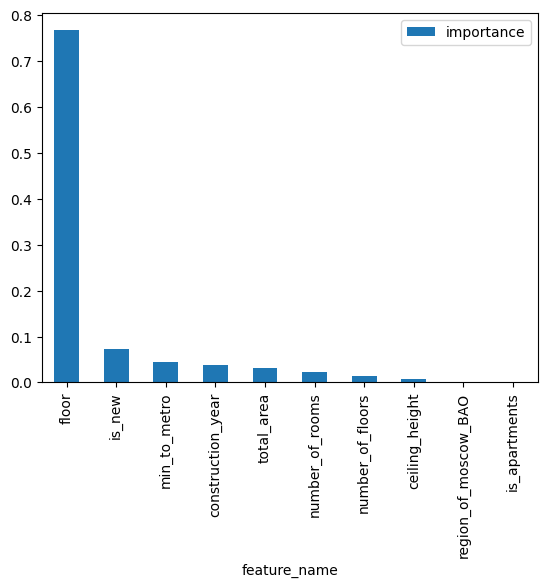

In [ ]:
feature_importances.plot(x='feature_name',
                         y='importance',
                         kind='bar');

In [ ]:
final_model = DecisionTreeRegressor(random_state=15,
                                    max_depth=8,
                                    min_samples_leaf=3)

final_model.fit(X_train_new, y_train)


y_train_pred = final_model.predict(X_train_new)
y_test_pred = final_model.predict(X_test_new)


In [ ]:
RMSE_train = sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE_train', RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE_test', RMSE_test)


RMSE_train 17253224.853326894
RMSE_test 21576890.92700582


In [ ]:
with open('final_model.pkl', 'wb') as f:
  pickle.dump(final_model, f)

# Сохранение моделей - для приложения

In [ ]:
X = df.drop(columns = target)
y = df[target]
print(X.shape, y.shape)

(1937, 11) (1937, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True, random_state = 68)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1549, 11)
(1549, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(388, 11)
(388, 1)


In [ ]:
 for i in (['ceiling_height', 'floor', 'number_of_floors']):
   s = X_train[i].std()
   left = -3 * s + X_train[i].mean()
   right = 3 * s + X_train[i].mean()
   X_train.loc[df[i] < left, i] = np.NaN
   X_train.loc[df[i] > right, i] = np.NaN

In [ ]:
for i in (['ceiling_height', 'floor', 'number_of_floors']):
   s = X_test[i].std()
   left = -3 * s + X_test[i].mean()
   right = 3 * s + X_test[i].mean()
   X_test.loc[df[i] < left, i] = np.NaN
   X_test.loc[df[i] > right, i] = np.NaN

In [ ]:
knn = KNNImputer()
knn.fit(X_train[numerical_features])

KNNImputer()

In [ ]:
%%time
X_train[numerical_features] = knn.transform(X_train[numerical_features])

CPU times: user 194 ms, sys: 152 ms, total: 345 ms
Wall time: 196 ms


In [ ]:
%%time
X_test[numerical_features] = knn.transform(X_test[numerical_features])

CPU times: user 52 ms, sys: 48.9 ms, total: 101 ms
Wall time: 54.1 ms


In [ ]:
si_cat = SimpleImputer(strategy='most_frequent')
si_cat.fit(X_train[categorical_features])
X_train[categorical_features] = si_cat.transform(X_train[categorical_features])
X_test[categorical_features] = si_cat.transform(X_test[categorical_features])

In [ ]:
X_test.isna().sum()

,0
min_to_metro,0
region_of_moscow,0
total_area,0
living_area,0
floor,0
number_of_floors,0
construction_year,0
is_new,0
is_apartments,0
ceiling_height,0


In [ ]:
df_no_m = pd.concat([X_train, X_test], axis=0)
df_no_m1 = pd.concat([y_train, y_test], axis=0)
df_clean = pd.concat([df_no_m, df_no_m1], axis=1)
df_clean.drop(columns = ['living_area'], inplace = True)

In [ ]:
cat_cols = df_clean.describe(include = 'object').columns.to_list() #список с категориальными признаками
cat_data = df_clean[cat_cols]
cat_data.head()

,region_of_moscow
761,НАО (Новомосковский)
1206,ЦАО
1929,ЦАО
1249,ЦАО
646,ЮАО


In [ ]:
le = LabelEncoder()
for column in cat_cols:
  cat_data[column + '_LE'] = le.fit_transform(cat_data[column])
  with open(f'{column}_LE.pkl', 'wb') as f:
    pickle.dump(le, f)

cat_data.head()

,region_of_moscow,region_of_moscow_LE
761,НАО (Новомосковский),3
1206,ЦАО,7
1929,ЦАО,7
1249,ЦАО,7
646,ЮАО,8


In [ ]:
cat_data.drop(cat_cols, axis = 1, inplace = True)
cat_data.head()

,region_of_moscow_LE
761,3
1206,7
1929,7
1249,7
646,8


In [ ]:
num_cols = df_clean.describe().columns.to_list()
num_data = df_clean[num_cols]
num_data.head()

,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,price
761,12.0,37.5,4.0,17.0,2013.0,0,0,2.740,1.0,8700000
1206,5.0,26.0,5.0,5.0,1912.0,0,1,3.500,1.0,16300000
1929,2.0,185.0,27.0,18.4,2010.4,0,1,3.280,3.0,112000000
1249,2.0,14.7,1.0,2.0,1950.0,0,1,2.786,1.0,7990000
646,3.0,122.4,1.0,18.0,1958.0,0,0,3.100,1.0,37000000


In [ ]:
dataset = pd.concat([cat_data, num_data], axis = 1)
dataset.head()

,region_of_moscow_LE,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,price
761,3,12.0,37.5,4.0,17.0,2013.0,0,0,2.740,1.0,8700000
1206,7,5.0,26.0,5.0,5.0,1912.0,0,1,3.500,1.0,16300000
1929,7,2.0,185.0,27.0,18.4,2010.4,0,1,3.280,3.0,112000000
1249,7,2.0,14.7,1.0,2.0,1950.0,0,1,2.786,1.0,7990000
646,8,3.0,122.4,1.0,18.0,1958.0,0,0,3.100,1.0,37000000


In [ ]:
y = np.array(dataset['price'])
X = np.array(dataset.drop('price', axis = 1))
print(y[:2])
print(X[:2])

[ 8700000 16300000]
[[3.000e+00 1.200e+01 3.750e+01 4.000e+00 1.700e+01 2.013e+03 0.000e+00
  0.000e+00 2.740e+00 1.000e+00]
 [7.000e+00 5.000e+00 2.600e+01 5.000e+00 5.000e+00 1.912e+03 0.000e+00
  1.000e+00 3.500e+00 1.000e+00]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X[:2])
print(X_scaled[:2])

#сохраняем модель
with open('num_scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

[[3.000e+00 1.200e+01 3.750e+01 4.000e+00 1.700e+01 2.013e+03 0.000e+00
  0.000e+00 2.740e+00 1.000e+00]
 [7.000e+00 5.000e+00 2.600e+01 5.000e+00 5.000e+00 1.912e+03 0.000e+00
  1.000e+00 3.500e+00 1.000e+00]]
[[-0.88596609  0.25307977 -0.64520394 -0.63644666 -0.15742069  0.2203222
  -0.69754531 -1.17581199 -1.25132065 -1.1087822 ]
 [ 0.52705681 -0.95690212 -0.94523894 -0.52168885 -1.14663034 -4.08603329
  -0.69754531  0.85047611  2.28127684 -1.1087822 ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1549, 10)
(388, 10)
(1549,)
(388,)


In [ ]:
final_model = DecisionTreeRegressor(random_state=15,
                                    max_depth=8,
                                    min_samples_leaf=3)

In [ ]:
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=15)

In [ ]:
y_pred = final_model.predict(X_test[12:15])

print(y_pred)
print(y_test[12:15])

[1.21036000e+07 1.19433476e+07 1.07998356e+08]
[13950000 12999999 86160000]


In [ ]:
with open('final_model.pkl', 'wb') as f:
  pickle.dump(final_model, f)

In [ ]:
with open('final_model.pkl', 'rb') as f:
  loaded_final_model = pickle.load(f)

In [ ]:
print(final_model.predict(X_test[:10]))

print(loaded_final_model.predict(X_test[:10]))

[2.26599110e+08 1.80333333e+07 9.63437054e+06 1.17160626e+07
 1.17160626e+07 3.15389103e+07 1.71849783e+07 1.77926472e+07
 5.95115786e+06 1.77128667e+08]
[2.26599110e+08 1.80333333e+07 9.63437054e+06 1.17160626e+07
 1.17160626e+07 3.15389103e+07 1.71849783e+07 1.77926472e+07
 5.95115786e+06 1.77128667e+08]
